© Alexander Jüstel, Fraunhofer IEG, Institution for Energy Infrastructures and Geothermal Systems, RWTH Aachen University,
GNU Lesser General Public License v3.0

# 12 Processing Results - Calculating Zonal Statistics

This notebook illustrates the statistical evaluation on a national scale for the total heat demand using `rasterstats` and `pandas`.

## Importing Libraries

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rasterio

from pyheatdemand import processing 

C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Calculating Zonal Statistics

The zonal statistics are calculated with the function `calculate_zonal_statistics`. 

In [2]:
gdf_outline = gpd.read_file("../../../test/data/nw_dvg1_rbz.shp")
gdf_outline

,ART,GN,KN,STAND,geometry
0,R,Arnsberg,05900000,20230612,"POLYGON ((3854043.358 2686588.658, 3854042.704..."
1,R,Detmold,05700000,20230612,"POLYGON ((3922577.630 2751867.434, 3922590.877..."
2,R,Köln,05300000,20230612,"MULTIPOLYGON (((3815551.417 2711668.010, 38155..."
3,R,Düsseldorf,05100000,20230612,"POLYGON ((3808552.027 2712730.070, 3808544.236..."
4,R,Münster,05500000,20230612,"MULTIPOLYGON (((3827457.753 2766673.130, 38274..."


In [3]:
gdf_stats = processing.calculate_zonal_stats("../../../test/data/nw_dvg1_rbz.shp", 
                                             "../../../test/data/HD_NRW3.tif",
                                             
                                             'EPSG:3034')
gdf_stats

,geometry,ART,GN,KN,STAND,min,max,std,median,Area (planimetric),Total Heat Demand,Average Heat demand per unit area,Share of Total HD [%],Share of Total Area [%],Heated Area,Share of Heated Area [%]
0,"POLYGON ((3854043.358 2686588.658, 3854042.704...",R,Arnsberg,05900000,20230612,0.0,3.815516e+06,171503.338902,29230.050675,7.471599e+09,5.374480e+08,69294.477189,21.136757,23.485618,1.939000e+09,25.951608
1,"POLYGON ((3922577.630 2751867.434, 3922590.877...",R,Detmold,05700000,20230612,0.0,4.714675e+06,147824.723089,23412.106243,6.086689e+09,3.379569e+08,53516.526539,13.291170,19.132405,1.578750e+09,25.937748
2,"MULTIPOLYGON (((3815551.417 2711668.010, 38155...",R,Köln,05300000,20230612,0.0,3.639637e+06,158537.834494,26663.569200,6.866552e+09,5.479812e+08,62178.733582,21.551008,21.583762,2.203250e+09,32.086702
3,"POLYGON ((3808552.027 2712730.070, 3808544.236...",R,Düsseldorf,05100000,20230612,0.0,2.351139e+07,523489.459877,28020.039788,4.935276e+09,7.847293e+08,92779.535857,30.861840,15.513148,2.114500e+09,42.844612
4,"MULTIPOLYGON (((3827457.753 2766673.130, 38274...",R,Münster,05500000,20230612,0.0,3.220365e+06,120267.799003,19442.202986,6.453391e+09,3.346019e+08,51358.690587,13.159225,20.285067,1.628750e+09,25.238668


In [4]:
gdf_stats['coords'] = gdf_stats['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf_stats['coords'] = [coords[0] for coords in gdf_stats['coords']]

## Plotting Results

Text(53.972222222222214, 0.5, 'Y [m]')

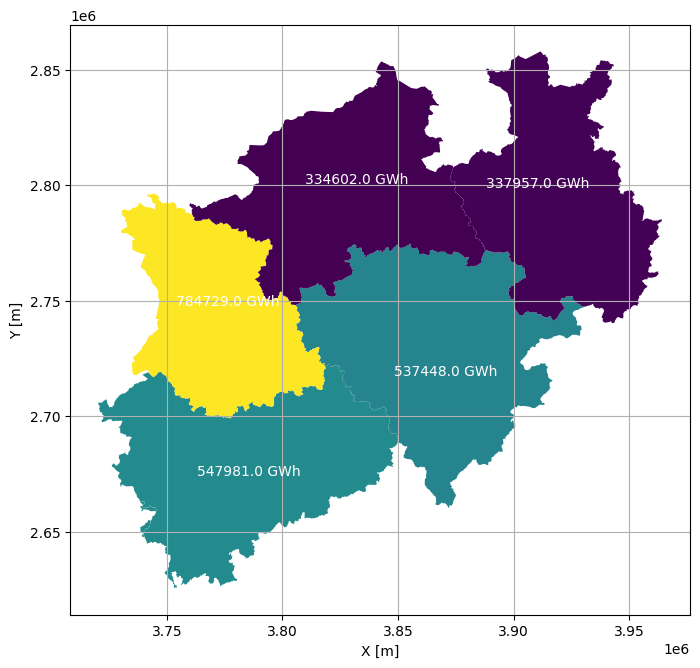

In [5]:
fix, ax = plt.subplots(1, figsize=(8,8))

gdf_stats.plot(ax=ax, column='Total Heat Demand')

for idx, row in gdf_stats.iterrows():
    
    plt.annotate(text=str(np.round(row['Total Heat Demand']/1000,
                                   0)) + ' GWh', 
                 xy=row['coords'],
                 horizontalalignment='center', 
                 color = 'white')

plt.grid()
plt.xlabel('X [m]')
plt.ylabel('Y [m]')

# plt.savefig('../../images/fig_methods5.png', dpi=300)

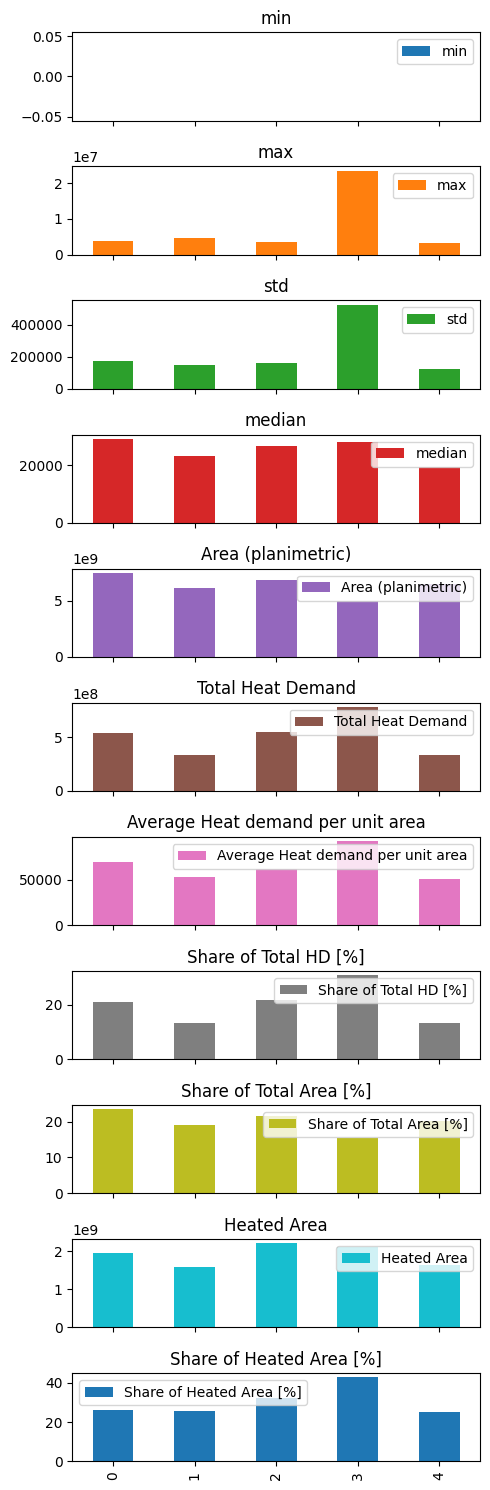

In [6]:
gdf_stats.plot(kind="bar", subplots=True, figsize=(5,15)) 

plt.tight_layout()

In [7]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct, absolute)

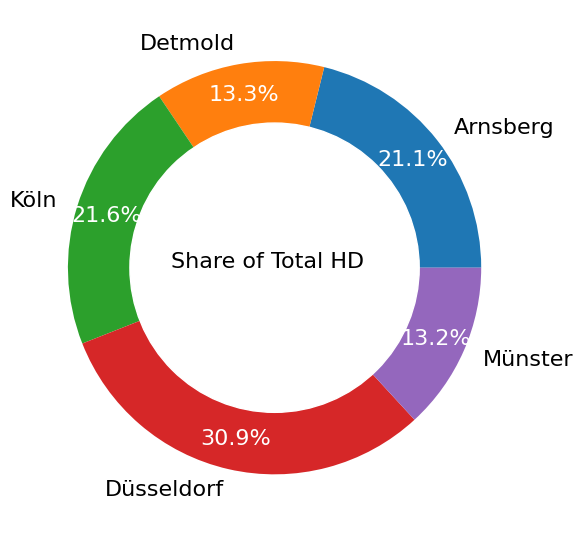

In [8]:
plt.figure(figsize=(6,6))
wedges, texts,  autotexts = plt.pie(gdf_stats['Share of Total HD [%]'].values, 
                                    labels=gdf_stats['GN'].to_list(), 
                                    autopct=lambda pct: func(pct, 
                                                             gdf_stats['Share of Total HD [%]'].values), 
                                    pctdistance=0.85, 
                                    textprops={'fontsize': 16})
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
plt.setp(autotexts, size=16, color='white')
p.gca().add_artist(my_circle)
plt.text(-0.5,0, 'Share of Total HD', fontsize=16)
plt.tight_layout()
plt.show()

#plt.savefig('Share_of_total_HD.png', dpi=300)

## Plotting Histogram

In [9]:
raster = rasterio.open("../../../test/data/HD_NRW3.tif")
data = raster.read(1)[np.where(raster.read(1)>0)]
data = data[np.where(data<20000)]
data

array([15959.459022  ,  2390.08510462, 10122.03017319, ...,
       14381.90610789,  2115.10768766, 14381.90610789])

Text(0, 0.5, 'Frquency')

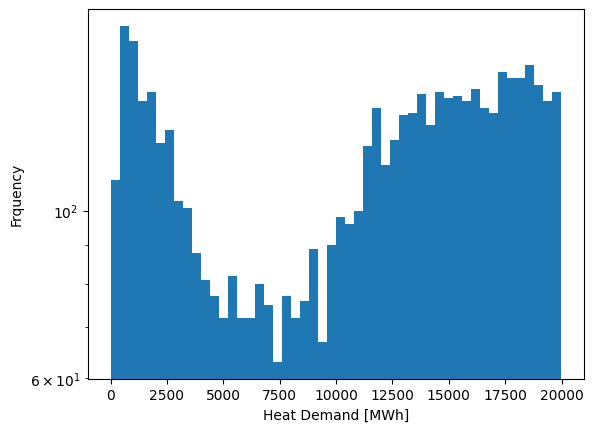

In [10]:
plt.hist(data, bins=50)
plt.yscale('log')
plt.xlabel('Heat Demand [MWh]')
plt.ylabel('Frquency')